<a href="https://colab.research.google.com/github/nJiyeon/ComputerVision/blob/main/Assignment1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
up = files.upload()  # 실행하면 파일 선택창이 뜸. digits.png 선택

Saving apple.jpg to apple.jpg


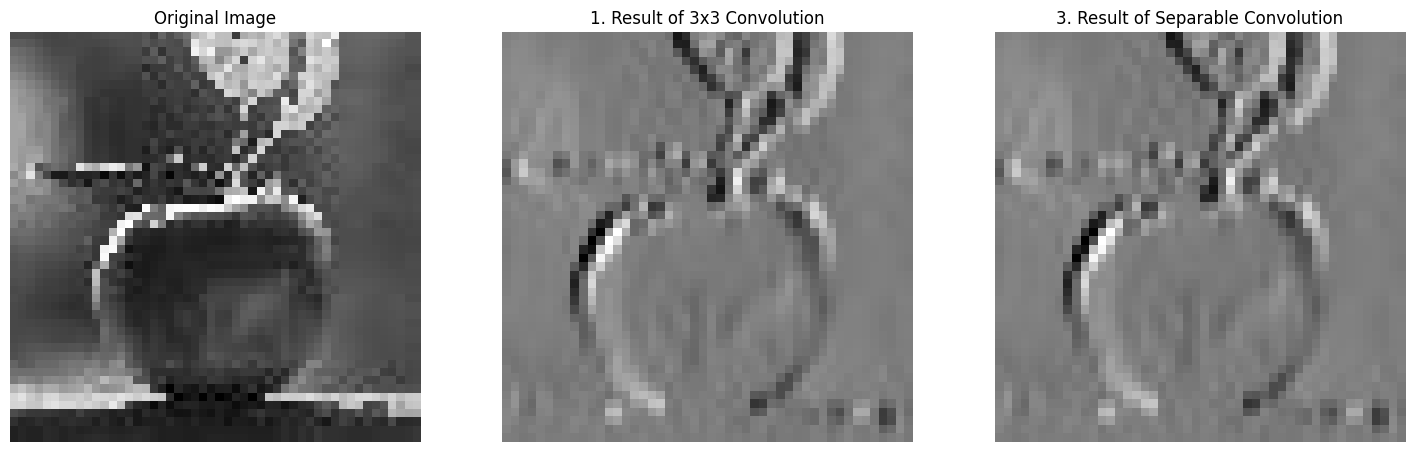


1번과 3번의 결과가 동일한가? True


In [3]:
import torch
import torch.nn.functional as F
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

try:
    image = Image.open('apple.jpg').convert('L')
except FileNotFoundError:
    print("Error: 'apple.jpg' not found")
    exit()

np_image = np.array(image)
# PyTorch 텐서로 변환 (N, C, H, W) 형식
input_tensor = torch.from_numpy(np_image).float().unsqueeze(0).unsqueeze(0)

# --- 필터 정의 ---
# 1번 문제의 3x3 필터
F_3x3 = torch.tensor([
    [1., 0., -1.],
    [2., 0., -2.],
    [1., 0., -1.]
]).unsqueeze(0).unsqueeze(0) # (out_channels, in_channels, H, W) 형식

# 2번 문제에서 분해된 필터
col_vector = torch.tensor([1., 2., 1.]).unsqueeze(1) # 크기: [3, 1]
row_vector = torch.tensor([1., 0., -1.]).unsqueeze(0) # 크기: [1, 3]

# PyTorch 컨볼루션에 맞게 형식 변환
# 열 벡터 필터 (3x1)
F_col = col_vector.unsqueeze(0).unsqueeze(0) # (1, 1, 3, 1)
# 행 벡터 필터 (1x3)
F_row = row_vector.unsqueeze(0).unsqueeze(0) # (1, 1, 1, 3)

# 1. 3x3 필터 F를 사용한 컨볼루션
output_1 = F.conv2d(input_tensor, F_3x3, stride=1, padding=0)
output_1_np = output_1.squeeze().detach().numpy()

# 3. 분해된 벡터를 사용한 컨볼루션

# 먼저 열 벡터(3x1 필터)로 컨볼루션 수행
intermediate_output = F.conv2d(input_tensor, F_col, stride=1, padding=0)

# 그 다음 행 벡터(1x3 필터)로 컨볼루션 수행
output_3 = F.conv2d(intermediate_output, F_row, stride=1, padding=0)
output_3_np = output_3.squeeze().detach().numpy()


# --- 결과 시각화 ---
plt.figure(figsize=(18, 6))

# 원본 이미지
plt.subplot(1, 3, 1)
plt.imshow(np_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# 1번 결과
plt.subplot(1, 3, 2)
plt.imshow(output_1_np, cmap='gray')
plt.title('1. Result of 3x3 Convolution')
plt.axis('off')

# 3번 결과
plt.subplot(1, 3, 3)
plt.imshow(output_3_np, cmap='gray')
plt.title('3. Result of Separable Convolution')
plt.axis('off')

plt.show()

# 두 결과가 동일한지 확인
are_equal = np.allclose(output_1_np, output_3_np)
print(f"\n1번과 3번의 결과가 동일한가? {are_equal}")